In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
n = 100 
ma_params = [0.4, -0.2] # 이동평균 계수 
residuals = np.random.normal(0, 1, n) # 전차 생성


# MA(2) 모델 생성
data = [0 , 0]
for i in range(2, n) :
    data.append(ma_params[0] * residuals[i - 1] + ma_params[1] + residuals[i-2] + residuals[i])
    
df = pd.DataFrame({
    'Value' : data
})

print(df)

       Value
0   0.000000
1   0.000000
2   0.041073
3   2.301709
4   2.945039
..       ...
95 -0.210585
96  1.069676
97  1.248671
98  2.509972
99  2.440809

[100 rows x 1 columns]


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -132.764
Date:                Wed, 31 May 2023   AIC                            273.527
Time:                        17:44:39   BIC                            283.948
Sample:                             0   HQIC                           277.745
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3840      0.215      1.788      0.074      -0.037       0.805
ma.L1          0.4420      0.056      7.906      0.000       0.332       0.552
ma.L2          0.9676      0.083     11.649      0.0

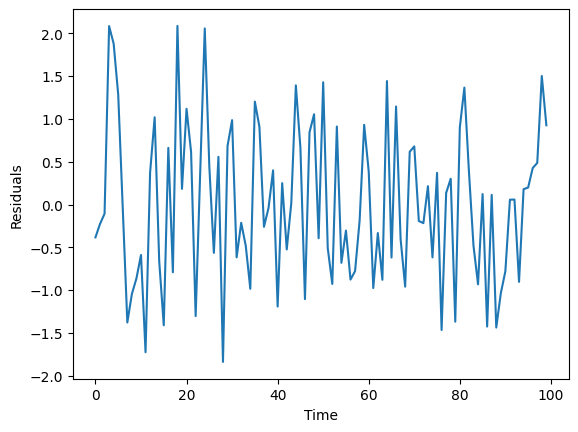

In [3]:
model = ARIMA(df['Value'], order=(0,0,2))
results = model.fit()

print(results.summary())

plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()